In [2]:
import pandas as pd
ds1 = pd.read_csv('general_data.csv')
ds1.head(50)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [12]:
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn import preprocessing
label_encoder= preprocessing.LabelBinarizer()
ds1['Attrition']= label_encoder.fit_transform(ds1['Attrition'])
ds1.head()
chitable=pd.crosstab(ds1.Attrition, ds1.BusinessTravel)
r,p,dof,expeted = chi2_contingency(chitable)
print(r,p)
print(chitable)
# r,p = mannwhitneyu(ds1.Attrition=='1' , ds1.DistanceFromHome)
# print(r,p)

72.54724105696552 1.764276972983189e-16
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      414                624           2661
1                       36                207            468


Attrition=1 means 'YES'
# HYPOTHESIS 1:

P-value=1.764276972983189e-16 < 0.05 , H0 is rejected .

Therefore Employees that travel rarely have more probability of attrition.

In [29]:
chitable=pd.crosstab(ds1.Attrition, ds1.Department)
r,p,dof,expeted = chi2_contingency(chitable)
# print(r,p)
print(chitable)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                       132                    2430   1137
1                        57                     453    201


# HYPOTHESIS 2:

Employees in the Research & Development department have a higher chance of attrition than the other departments.

In [3]:
# import matplotlib.pyplot as plt
ds2= pd.read_excel('att_yes.xlsx' , sheet_name=0)
ds2[['DistanceFromHome']].kurt()

DistanceFromHome   -0.041771
dtype: float64

# HYPOTHESIS 3:

Since kurtosis value = -0.04 , which is platykurtic means Distance from home is not a major factor in Attrtion of employees

In [4]:
ds2['Age'].kurt()

-0.07314380565687317

# HYPOTHESIS 3:

Since kurtosis value = -0.07 , which is platykurtic means Age is not a major factor in Attrtion of employees

In [40]:
chitable=pd.crosstab(ds1.Attrition, ds1.Gender)
r,p,dof,expeted = chi2_contingency(chitable)
# print(r,p)
print(chitable)

Gender     Female  Male
Attrition              
No           1494  2205
Yes           270   441


# HYPOTHESIS 4:

frrom the chitable it is observable that male employees have a higher attrtion rate than female employees.

In [42]:
chitable=pd.crosstab(ds1.Attrition, ds1.JobRole)
r,p,dof,expeted = chi2_contingency(chitable)
# print(r,p)
print(chitable)

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                               336              135                    651   
Yes                               57               21                    126   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No             264                     387                183   
Yes             42                      48                 57   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                        717              813                   213  
Yes                       159              165                    36  


# HYPOTHESIS 5:

From the chitable it is observable , that Sales Executive have the highest attrition rate and HR has lowest

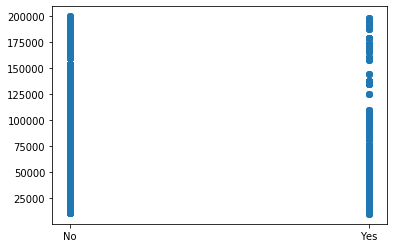

In [10]:
import matplotlib.pyplot as plt
plt.scatter(ds1.Attrition,ds1.MonthlyIncome)
# ds2['MonthlyIncome'].kurt()

# ds2['MonthlyIncome'].skew()

# HYPOTHESIS 6:

Employees with a monthly income of less than 1,25,000 have a higher attrtion rate.

In [16]:
chitable=pd.crosstab(ds2.Attrition, ds2.PercentSalaryHike)
r,p,dof,expeted = chi2_contingency(chitable)
# print(r,p)
print(chitable)
# ds2['']

PercentSalaryHike  11  12   13  14  15  16  17  18  19  20  21  22  23  24  25
Attrition                                                                     
Yes                90  90  102  87  63  30  45  39  42  27  27  30  15   9  15


# HYPOTHESIS 7:

It is observable that employees having a percent salary hike less than 23% are more likely to leave the company.

In [18]:
chitable=pd.crosstab(ds2.Attrition, ds2.JobLevel)
r,p,dof,expeted = chi2_contingency(chitable)
# print(r,p)
print(chitable)

JobLevel     1    2   3   4   5
Attrition                      
Yes        252  285  96  51  27


# HYPOTHESIS 8:

Employees with a jonb level of 1 ,2,3 have higher attrition rate than 4,5

In [19]:
chitable=pd.crosstab(ds2.Attrition, ds2.NumCompaniesWorked)
r,p,dof,expeted = chi2_contingency(chitable)
# print(r,p)
print(chitable)

NumCompaniesWorked  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Attrition                                                           
Yes                  69  293   48   48   50   46   48   51   18   36


# HYPOTHESIS 9:

Employees who have worked for 1 number of comapnies have higher arte of attrition than others.

In [28]:
chitable=pd.crosstab(ds2.Attrition, ds2.StockOptionLevel)
r,p,dof,expeted = chi2_contingency(chitable)
# print(r,p)
print(chitable)

StockOptionLevel    0    1   2   3
Attrition                         
Yes               318  270  84  39


# HYPOTHESIS 10:

Employees with a stock option level of 0 have the highest attrition rate.